In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [5]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [6]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [7]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

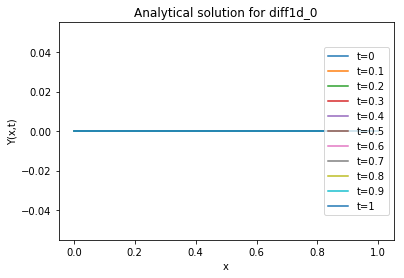

In [8]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Powell (default)

In [7]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Powell'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 67
         Function evaluations: 29583
8min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
   direc: array([[-6.03684842e-04,  1.55293837e+02,  7.66883693e-04, ...,
        -3.69134739e-05, -6.63618858e-05,  1.50706425e-04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.57068924e-03,  2.40359109e+02, -1.73412379e-04, ...,
         4.65837612e-05, -3.98523832e-04,  3.25930205e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.96454449e-04,  1.04090361e+01, -1.83532636e-04, ...,
        -6.52322744e-07,  2.71856362e-05, -2.20205013e-05]])
     fun: 2.33656120640103

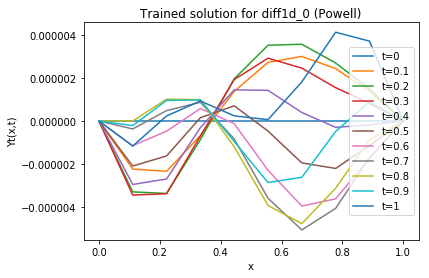

In [8]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

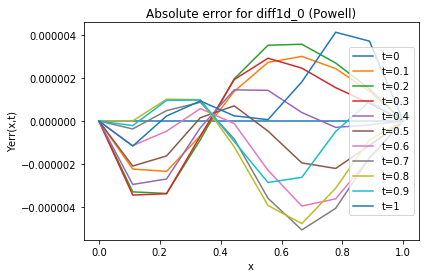

In [16]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## Powell (ftol=xtol=1e-6)

In [11]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Powell'
options = {}
options['disp'] = True
options['ftol'] = 1e-6
options['xtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

11min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
   direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.15801156e+01, -3.73850749e-02,  9.15801156e+01, ...,
        -1.92537587e-05, -5.65857703e-05, -2.33066464e-05],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.91712727e+01, -2.94692545e-03,  4.91712727e+01, ...,
        -1.93221234e-04,  1.03866400e-04,  1.40237477e-05]])
     fun: 4.7052401526795844e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 40069
     nit: 73
  status: 1
 success: False
      

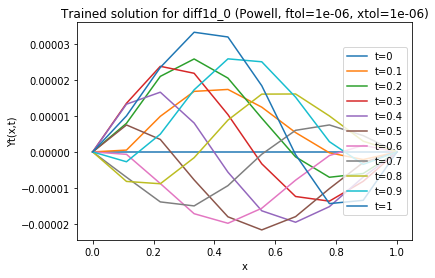

In [17]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

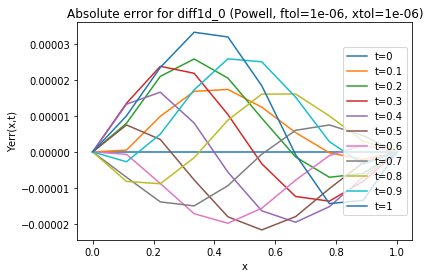

In [18]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

## Powell (maxfev=16000, xtol=ftol=1e-6)

In [21]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Powell'
options = {}
options['disp'] = True
options['ftol'] = 1e-6
options['maxfev'] = 16000
options['xtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

4min 46s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
   direc: array([[ 5.01337059e-03,  2.01787960e+02,  2.00358559e-02, ...,
        -8.11736449e-04,  3.31043017e-03,  1.81798840e-04],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.93999376e-03,  2.76019965e+01,  4.16183083e-04, ...,
        -8.30498294e-06,  1.41583304e-04,  2.78569530e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 9.71598252e-04, -1.27181302e+01, -5.45994869e-03, ...,
         3.23849328e-05, -1.16890143e-03,  4.35181678e-04]])
     fun: 1.990538749217029e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 16394
     nit: 33
  status: 1
 success: False
       x

In [20]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

NameError: name 'net3' is not defined

In [ ]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

## Powell (maxfev=32000, xtol=ftol=1e-6)

In [12]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Powell'
options = {}
options['disp'] = True
options['ftol'] = 1e-6
options['maxfev'] = 32000
options['xtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

10min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
   direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.15406746e+01, -8.97650174e-02,  4.15406746e+01, ...,
         7.73584590e-05, -3.12532693e-04,  3.99171193e-04],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 9.15801156e+01, -3.73850749e-02,  9.15801156e+01, ...,
        -1.92537587e-05, -5.65857703e-05, -2.33066464e-05]])
     fun: 6.808966752868824e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 32417
     nit: 59
  status: 1
 success: False
       

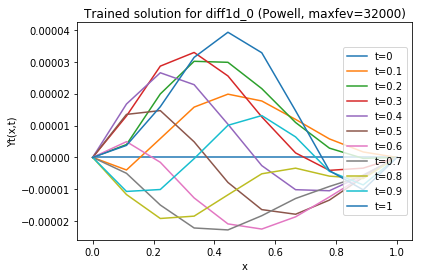

In [13]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

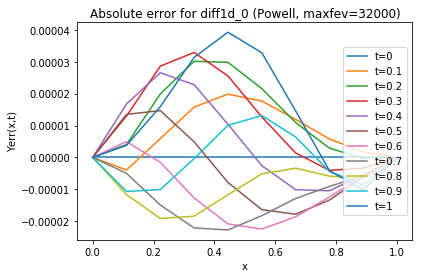

In [14]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

## Powell (maxfev=64000, xtol=ftol=1e-6)

In [16]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Powell'
options = {}
options['disp'] = True
options['ftol'] = 1e-6
options['maxfev'] = 64000
options['xtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

19min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
   direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.25475232e+01, -1.74653487e-05,  3.25475232e+01, ...,
        -1.10460617e-04,  6.14805226e-05,  3.41083766e-05],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.89144851e+02,  1.01560622e-05,  5.89144851e+02, ...,
         2.11172926e-04, -1.47599608e-04,  3.56564045e-06]])
     fun: 2.5850827850694617e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 64599
     nit: 116
  status: 1
 success: False
     

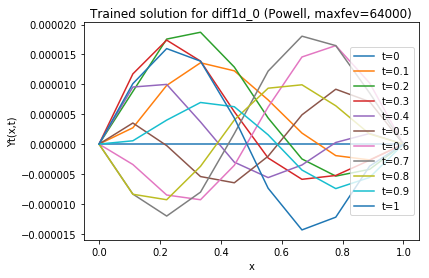

In [17]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

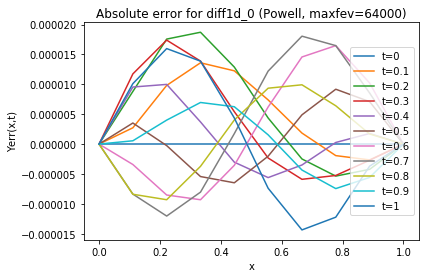

In [18]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

## Powell (maxfev=128000, xtol=ftol=1e-6)

In [19]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'Powell'
options = {}
options['disp'] = True
options['ftol'] = 1e-6
options['maxfev'] = 128000
options['xtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

37min 37s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
   direc: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.25475232e+01, -1.74653487e-05,  3.25475232e+01, ...,
        -1.10460617e-04,  6.14805226e-05,  3.41083766e-05],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.61768175e+02,  9.00484232e-06,  1.61768175e+02, ...,
         1.73901935e-05,  1.94499726e-05, -3.77628590e-06]])
     fun: 2.107698409494616e-05
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 128174
     nit: 226
  status: 1
 success: False
     

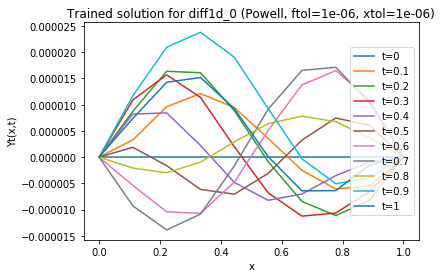

In [21]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));

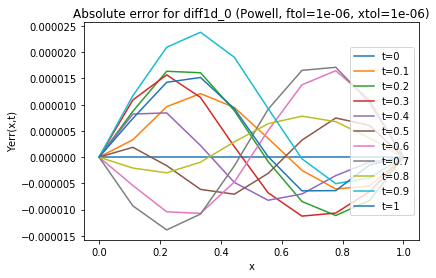

In [22]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, ftol=%g, xtol=%g)' % (eq_name, trainalg, options['ftol'], options['xtol']));